## 1. 张量

In [1]:
import tensorflow as tf
print(tf.__version__)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.5.0


In [2]:
import numpy as np


###  1. 在 tensorflow中创建张量

In [3]:
row_dim = 4
col_dim = 3
sess = tf.Session()
zero_tsr = tf.zeros([row_dim,col_dim],dtype=np.float32)
print("The {} function give us:".format("tf.zeros([row_dim,col_dim],dtype=np.float32)"))
print(sess.run(zero_tsr))
ones_tsr = tf.ones([row_dim,col_dim])
print("The {} function give us:".format("tf.ones([row_dim,col_dim])"))
print(sess.run([ones_tsr]))
filled_tsr = tf.fill([row_dim,col_dim],42)
print("The {} function give us:".format("tf.fill([row_dim,col_dim],42)"))
print(sess.run(filled_tsr))
constant_tsr = tf.constant([1,2,3])
print("The {} function give us:".format("constant_tsr = tf.constant([1,2,3])"))
print(sess.run(constant_tsr))
constant_tsr = tf.constant(42,dtype=tf.float32,shape=[row_dim,col_dim])
print("The {} function give us:".format("constant_tsr = tf.constant(42,dtype=tf.float32,shape=[row_dim,col_dim])"))
print(sess.run(constant_tsr))

The tf.zeros([row_dim,col_dim],dtype=np.float32) function give us:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
The tf.ones([row_dim,col_dim]) function give us:
[array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)]
The tf.fill([row_dim,col_dim],42) function give us:
[[42 42 42]
 [42 42 42]
 [42 42 42]
 [42 42 42]]
The constant_tsr = tf.constant([1,2,3]) function give us:
[1 2 3]
The constant_tsr = tf.constant(42,dtype=tf.float32,shape=[row_dim,col_dim]) function give us:
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


###  2. 在 tensorflow中创建形状相似的张量

In [4]:
zeros_similar = tf.zeros_like(constant_tsr)
print("The {} function give us:".format("zeros_similar = tf.zeros_like(constant_tsr)"))
print(sess.run(zeros_similar))

ones_similar = tf.ones_like(constant_tsr)
print("The {} function give us:".format("ones_similar = tf.ones_like(constant_tsr)"))
print(sess.run(ones_similar))

The zeros_similar = tf.zeros_like(constant_tsr) function give us:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
The ones_similar = tf.ones_like(constant_tsr) function give us:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


###  3. 在 tensorflow中创建序列张量

In [5]:
linear_tsr = tf.linspace(start=0.,stop=1.,num=3)
print(sess.run(linear_tsr))


[0.  0.5 1. ]


In [6]:
integer_seq_tsr = tf.range(start=6, limit=15, delta=3)
print(sess.run(integer_seq_tsr))

[ 6  9 12]


###  4. 在 tensorflow中创建随机张量

In [30]:
randunif_tsr = tf.random_uniform(shape=[row_dim,col_dim],minval=0,maxval=1)
xx = sess.run(randunif_tsr)
print(xx)
xx = tf.random_shuffle(xx)
print(sess.run(xx))

[[0.52269554 0.9806037  0.33541524]
 [0.89360213 0.09641433 0.05539775]
 [0.7770668  0.04764283 0.30275822]
 [0.12176585 0.53405    0.2751032 ]]
[[0.12176585 0.53405    0.2751032 ]
 [0.89360213 0.09641433 0.05539775]
 [0.7770668  0.04764283 0.30275822]
 [0.52269554 0.9806037  0.33541524]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


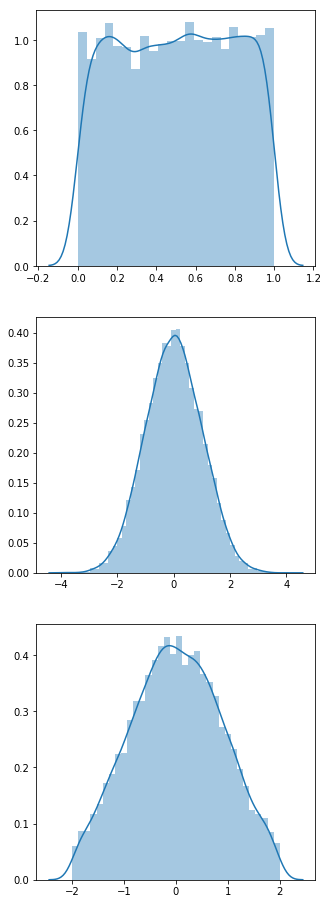

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

fig,ax = plt.subplots(3,1,figsize=(5,16))

rand_tsr = tf.random_uniform(shape=[100,100],minval=0,maxval=1)
xx = sess.run(rand_tsr)
sb.distplot(xx.ravel(),ax=ax[0])

rand_tsr = tf.random_normal(shape=[100,100],mean=0.0, stddev=1.0)
xx = sess.run(rand_tsr)
sb.distplot(xx.ravel(),ax=ax[1])

rand_tsr = tf.truncated_normal(shape=[100,100],mean=0.0, stddev=1.0)
xx = sess.run(rand_tsr)
sb.distplot(xx.ravel(),ax=ax[2])

plt.show()

###  5. 将numpy ndarray转换为张量

In [32]:
convert_tsr = tf.convert_to_tensor(np.zeros([5,5]))
print(sess.run(convert_tsr))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## 2. 变量和占位符